In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [26]:
data=pd.read_csv("churn_prediction_simple.csv")

In [27]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [28]:
#seperating the target and indepedent variables
x=data.drop(columns=["customer_id","churn"])
y=data["churn"]

In [29]:
#scaling  the dataset 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(x)

In [30]:
#spiliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.80,stratify=y)


# Model Building:

In [31]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight="balenced")
classifier=DTC()

In [32]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)


In [33]:
predicted_values[:30]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [35]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3559
           1       0.44      0.45      0.45       855

    accuracy                           0.78      4414
   macro avg       0.66      0.66      0.66      4414
weighted avg       0.79      0.78      0.78      4414



# visualising decision tree

[Text(0.42484935025012954, 0.9878048780487805, 'current_balance <= -0.296\ngini = 0.312\nsamples = 17653\nvalue = [14234, 3419]'),
 Text(0.13063306793939658, 0.9634146341463414, 'average_monthly_balance_prevQ <= -0.214\ngini = 0.476\nsamples = 2283\nvalue = [891, 1392]'),
 Text(0.049263001219034354, 0.9390243902439024, 'current_month_balance <= -0.33\ngini = 0.497\nsamples = 1594\nvalue = [738, 856]'),
 Text(0.02169881144150812, 0.9146341463414634, 'average_monthly_balance_prevQ2 <= -0.295\ngini = 0.408\nsamples = 484\nvalue = [138, 346]'),
 Text(0.013304889198484915, 0.8902439024390244, 'current_month_balance <= -0.337\ngini = 0.302\nsamples = 200\nvalue = [37, 163]'),
 Text(0.00808045626714267, 0.8658536585365854, 'age <= 1.133\ngini = 0.236\nsamples = 154\nvalue = [21, 133]'),
 Text(0.004458182768078715, 0.8414634146341463, 'current_month_credit <= 0.072\ngini = 0.193\nsamples = 139\nvalue = [15, 124]'),
 Text(0.0039009099220688754, 0.8170731707317073, 'age <= -1.673\ngini = 0.172\n

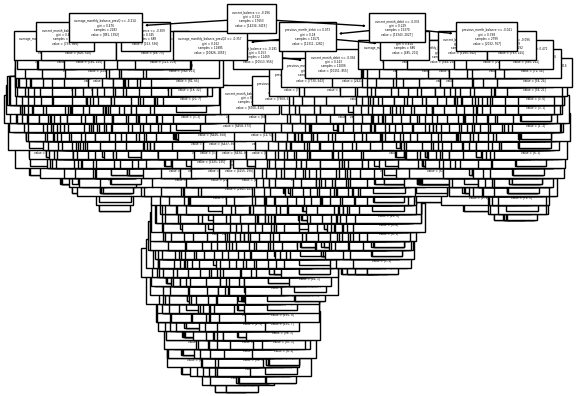

In [36]:
from sklearn import tree
tree.plot_tree(classifier,max_depth=None ,feature_names=x.columns,fontsize=2)

## max_depth

In [37]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [38]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (5,5), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()
              


In [39]:

maxdepth = [i for i in range(1,50)]
train = []
test = []

for i in maxdepth:  
  model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

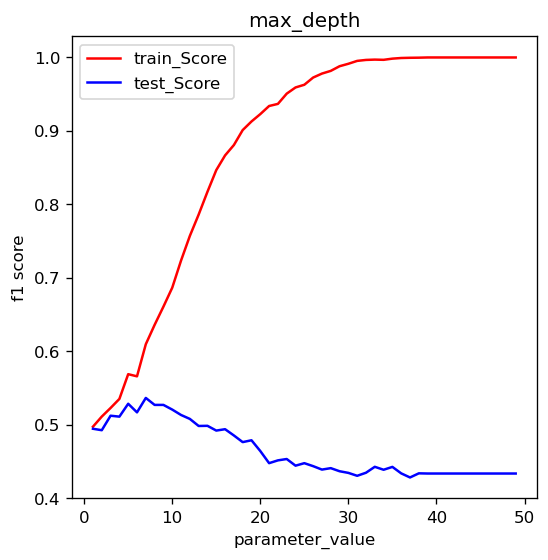

In [40]:
effect( train, test, range(1,50) , 'max_depth')

## min_samples_split

In [42]:
min_samples = [i for i in range(2,5000, 25)]
train = []
test = []

for i in min_samples:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

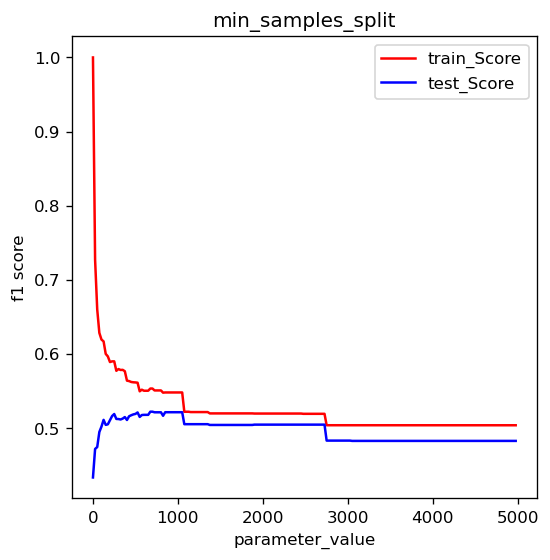

In [43]:
effect( train, test, range(2,5000, 25) , 'min_samples_split')

In [44]:
maxleafnodes = [i for i in range(2,200,10)]
train = []
test = []

for i in maxleafnodes:  
  model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

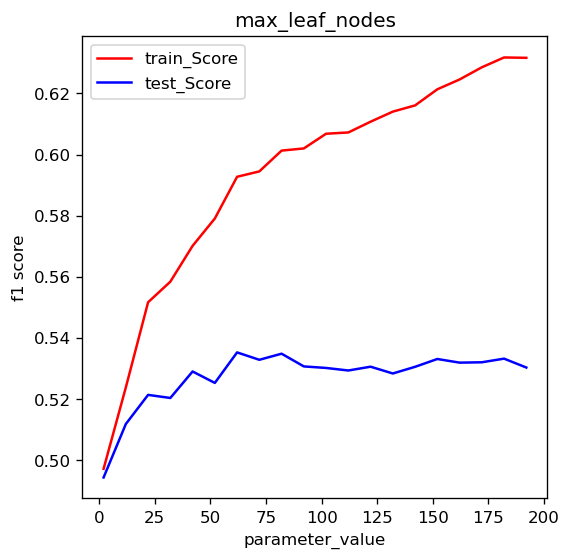

In [45]:
effect( train, test, range(2,200,10) , 'max_leaf_nodes')

In [48]:
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index = x.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

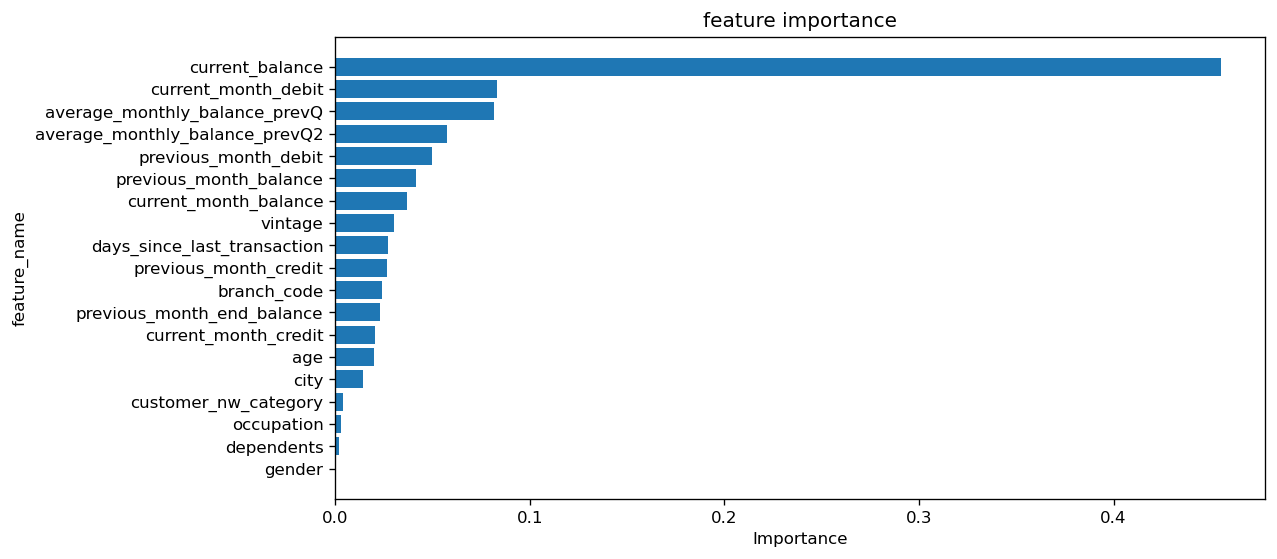

In [49]:
plt.figure(figsize = (10,5), dpi = 120)
plt.barh(k.index, k)
plt.xlabel('Importance')
plt.ylabel('feature_name')
plt.title('feature importance')

[Text(0.4513267649903288, 0.95, 'x[9] <= -0.296\ngini = 0.312\nsamples = 100.0%\nvalue = [0.806, 0.194]'),
 Text(0.21853844294003869, 0.85, 'x[11] <= -0.214\ngini = 0.476\nsamples = 12.9%\nvalue = [0.39, 0.61]'),
 Text(0.11133945841392649, 0.75, 'x[17] <= -0.33\ngini = 0.497\nsamples = 9.0%\nvalue = [0.463, 0.537]'),
 Text(0.058752417794970986, 0.65, 'x[12] <= -0.295\ngini = 0.408\nsamples = 2.7%\nvalue = [0.285, 0.715]'),
 Text(0.033123791102514503, 0.55, 'x[17] <= -0.337\ngini = 0.302\nsamples = 1.1%\nvalue = [0.185, 0.815]'),
 Text(0.017408123791102514, 0.45, 'x[1] <= 1.133\ngini = 0.236\nsamples = 0.9%\nvalue = [0.136, 0.864]'),
 Text(0.009671179883945842, 0.35, 'x[13] <= 0.072\ngini = 0.193\nsamples = 0.8%\nvalue = [0.108, 0.892]'),
 Text(0.007736943907156673, 0.25, 'x[1] <= -1.673\ngini = 0.172\nsamples = 0.8%\nvalue = [0.095, 0.905]'),
 Text(0.0038684719535783366, 0.15, 'x[6] <= 0.43\ngini = 0.469\nsamples = 0.0%\nvalue = [0.375, 0.625]'),
 Text(0.0019342359767891683, 0.05, 'gin

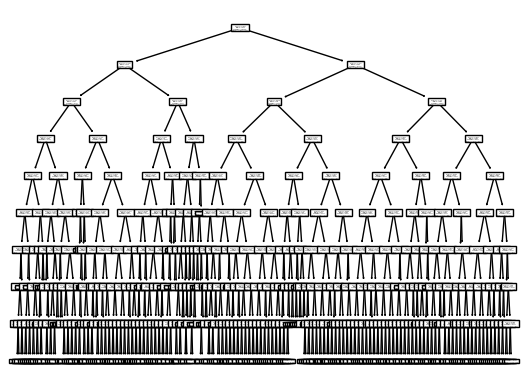

In [51]:
tree.plot_tree(model,proportion="balenced")